# Introduction to machine learning with scikit-learn

Based on the [scikit-learn documentation](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)

## Loading the 'breast cancer' dataset

Scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the Boston house prices dataset for regression.

In [222]:
import numpy as np
import sklearn
print(sklearn.__version__)

0.20.0


In [223]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the `.data` member, which is a `n_samples` by `n_features` array. In the case of supervised problem, one or more response variables are stored in the `.target` member.



In [224]:
cancer.keys()

dict_keys(['target', 'data', 'filename', 'feature_names', 'target_names', 'DESCR'])

In [225]:
n_features = len(cancer.feature_names)
print("There are %d features in this dataset" % n_features)
print("The features are:", cancer.feature_names)

There are 30 features in this dataset
The features are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


For instance, in the case of the breast cancer dataset, cancer.data gives access to the features that can be used to classify the samples:

In [226]:
print(cancer.data.shape)
print(cancer.data)

(569, 30)
[[1.80e+01 1.04e+01 1.23e+02 ... 2.65e-01 4.60e-01 1.19e-01]
 [2.06e+01 1.78e+01 1.33e+02 ... 1.86e-01 2.75e-01 8.90e-02]
 [1.97e+01 2.12e+01 1.30e+02 ... 2.43e-01 3.61e-01 8.76e-02]
 ...
 [1.66e+01 2.81e+01 1.08e+02 ... 1.42e-01 2.22e-01 7.82e-02]
 [2.06e+01 2.93e+01 1.40e+02 ... 2.65e-01 4.09e-01 1.24e-01]
 [7.76e+00 2.45e+01 4.79e+01 ... 0.00e+00 2.87e-01 7.04e-02]]


and `cancer.target` gives the ground truth for the dataset, that is whether the tumor is benign or not:

In [227]:
print(cancer.target.shape)
print(cancer.target)
print(cancer.target_names)

(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0

# Visualising the data

This is your chance to have a look at the data. Try some of the things from the seaborn/pandas lab session. What's easier for you, to work with this sort of dataset or with a pandas dataframe?

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\hecto\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(336.9714285714286, 0.5, 'mean texture')

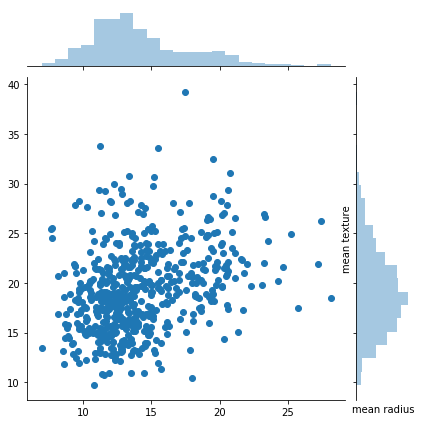

In [229]:
sns.jointplot(cancer.data[:, 0], cancer.data[:, 1])
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
Mean: 19.289649
Median: 18.840000
Var: 18.466397
std: 4.297255
MAD: 2.810000


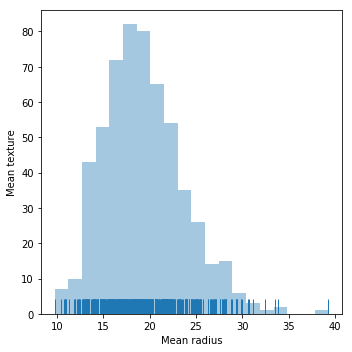

In [230]:
# Insert your own code visualization/analysis here.
# Try to come up with a method that you can use to determine whether your data requires any sort of standarisation



import pandas as pd

import seaborn as sns
import numpy as np
import sklearn.datasets as datasets
import csv


def mad(arr):
    """ Median Absolute Deviation: a "Robust" version of standard deviation.
        Indices variabililty of the sample.
        https://en.wikipedia.org/wiki/Median_absolute_deviation
        http://stackoverflow.com/questions/8930370/where-can-i-find-mad-mean-absolute-deviation-in-scipy
    """
    arr = np.ma.array(arr).compressed() # should be faster to not use masked arrays.
    med = np.median(arr)
    return np.median(np.abs(arr - med))

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'], ['target']))
if __name__ == "__main__":
	print((df.columns))
	sns_plot = sns.lmplot(df.columns[0], df.columns[1], data=df, fit_reg=False)

	sns_plot.axes[0,0].set_ylim(0,)
	sns_plot.axes[0,0].set_xlim(0,)

	sns_plot.savefig("scaterplot.png",bbox_inches='tight')
	sns_plot.savefig("scaterplot.pdf",bbox_inches='tight')

	data = df.values.T[1]

	print((("Mean: %f")%(np.mean(data))))
	print((("Median: %f")%(np.median(data))))
	print((("Var: %f")%(np.var(data))))
	print((("std: %f")%(np.std(data))))
	print((("MAD: %f")%(mad(data))))

	plt.clf()
	sns_plot2 = sns.distplot(data, bins=20, kde=False, rug=True).get_figure()

	axes = plt.gca()
	axes.set_xlabel('Mean radius')
	axes.set_ylabel('Mean texture')

	sns_plot2.savefig("histogram.png",bbox_inches='tight')
	sns_plot2.savefig("histogram.pdf",bbox_inches='tight')
    


## Learning and predicting
In the case of the breast cancer dataset, the task is to predict, given some features, whether the tumor is benign or malign. We are given samples of each case, and with these samples we fit an estimator to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods `fit(X, y)` and `predict(T)`.

An example of an estimator is the class `sklearn.svm.SVC` that implements support vector classification. The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box:

In [231]:
from sklearn import svm

clf = svm.SVC(gamma=0.0001, C=100.)

We call our estimator instance `clf`, as it is a classifier. **It now must be fitted to the model, that is, it must learn from the data**. This is done by passing our training set to the `fit` method. As a training set, let us use all the examples of our dataset except for the last one. We select this training set with the `[:-1]` Python syntax, which produces a new array that contains **all but the last entry** of `cancer.data`:

In [232]:
clf.fit(cancer.data[:-1], cancer.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now you can predict new values, in particular, we can ask to the classifier whether the tumor from the last example is benign or not. **Remember that this patient was NOT used to train the classifier**:

In [233]:
prediction = clf.predict((cancer.data[-1]).reshape(1, -1))

print ("Prediction of the last patient:", prediction)

Prediction of the last patient: [1]


We can also check what the real label for this patient was:

In [234]:
print ("Actual label of the last patient:", cancer.target[-1])

Actual label of the last patient: 1


Can you print the actual raw values of the 30 features for this patient?

In [235]:

print ( "Raw values of the last patient: \n",  cancer.data[-1])

Raw values of the last patient: 
 [7.76e+00 2.45e+01 4.79e+01 1.81e+02 5.26e-02 4.36e-02 0.00e+00 0.00e+00
 1.59e-01 5.88e-02 3.86e-01 1.43e+00 2.55e+00 1.91e+01 7.19e-03 4.66e-03
 0.00e+00 0.00e+00 2.68e-02 2.78e-03 9.46e+00 3.04e+01 5.92e+01 2.69e+02
 9.00e-02 6.44e-02 0.00e+00 0.00e+00 2.87e-01 7.04e-02]


In [236]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        print (t)
        plt.text(j, i, t, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
(207.00)
(5.00)
(3.00)
(354.00)


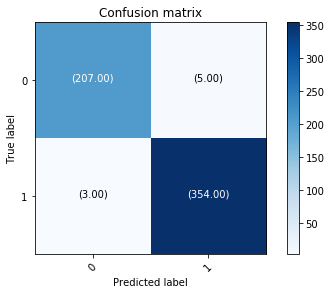

In [237]:
# Compute confusion matrix
y_pred = clf.predict(cancer.data)
cnf_matrix = confusion_matrix(cancer.target, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(cancer.target))), normalize = False,
                      title='Confusion matrix')

#plt.savefig("confusion.png",bbox_inches='tight')
#plt.savefig("confusion.pdf",bbox_inches='tight')

What are the most common types of errors?    ->  The False Negatives

## Cross-validation
**Learning the parameters of a prediction function and testing it on the same data is a methodological mistake**: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set `X_test`, `y_test`.

Scikit-learn has a collection of classes which can be used to generate lists of train/test indices for popular cross-validation strategies.

They expose a `split` method which accepts the input dataset to be split and yields the train/test set indices for each iteration of the chosen cross-validation strategy.

Let's try with a smaller subset of the `cancer` dataset.

In [238]:
from sklearn.model_selection import KFold, cross_val_score

clf = svm.SVC(gamma=0.0001, C=100.)
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(cancer.data[:40]): # consider the first 40 examples
    print('Train: %s | test: %s' % (train_indices, test_indices))
    clf.fit(cancer.data[train_indices], cancer.target[train_indices])
    print('Fold test accuracy: {} %'.format(clf.score(cancer.data[test_indices], cancer.target[test_indices])*100))

Train: [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39] | test: [0 1 2 3 4 5 6 7]
Fold test accuracy: 100.0 %
Train: [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39] | test: [ 8  9 10 11 12 13 14 15]
Fold test accuracy: 87.5 %
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39] | test: [16 17 18 19 20 21 22 23]
Fold test accuracy: 62.5 %
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 32 33 34 35 36 37 38 39] | test: [24 25 26 27 28 29 30 31]
Fold test accuracy: 100.0 %
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] | test: [32 33 34 35 36 37 38 39]
Fold test accuracy: 87.5 %


Let's now try with the whole dataset.

In [239]:
score = []
clf = svm.SVC(gamma=0.0001, C=100.)
k_fold = KFold(n_splits=10)
for train_indices, test_indices in k_fold.split(cancer.data):
    clf.fit(cancer.data[train_indices], cancer.target[train_indices])
    score.append(clf.score(cancer.data[test_indices], cancer.target[test_indices]))
print('Average accuracy: {} %'.format(np.mean(score)*100))

Average accuracy: 94.19486215538848 %


As a shortcut, we can use `cross_val_score` for the same purposes.

In [240]:
score_2 = cross_val_score(clf, cancer.data, cancer.target, cv=k_fold, n_jobs=-1)
print('Average accuracy: {} %'.format(np.mean(score_2)*100))

Average accuracy: 94.19486215538848 %


## Grid-search

Scikit-learn provides an object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. This object takes an estimator during the construction and exposes an estimator API:

In [241]:
from sklearn.model_selection import GridSearchCV

clf = svm.SVC(gamma=0.01, C=10.)
Cs = np.logspace(-1, 3, 9)
Gs = np.logspace(-7, -0, 8)
clf = GridSearchCV(estimator=clf, param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1)

score = []
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(cancer.data):
    clf.fit(cancer.data[train_indices], cancer.target[train_indices])
    score.append(clf.score(cancer.data[test_indices], cancer.target[test_indices]))
    print('Best C:', clf.best_estimator_.C,
          'Best gamma:', clf.best_estimator_.gamma,
          'Fold test accuracy:', score[-1])
print('Average accuracy: {} %'.format(np.mean(score)*100))

C:\Users\hecto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best C: 1000.0 Best gamma: 1e-06 Fold test accuracy: 0.8859649122807017


C:\Users\hecto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hecto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\hecto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best C: 1000.0 Best gamma: 1e-06 Fold test accuracy: 0.9649122807017544


C:\Users\hecto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\hecto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best C: 1000.0 Best gamma: 1e-05 Fold test accuracy: 0.9736842105263158
Best C: 1000.0 Best gamma: 1e-05 Fold test accuracy: 0.9736842105263158


C:\Users\hecto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best C: 1000.0 Best gamma: 1e-05 Fold test accuracy: 0.9380530973451328
Average accuracy: 94.72597422760441 %


Text(0, 0.5, 'log(gamma)')

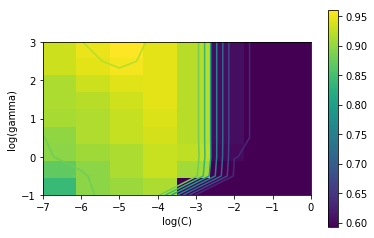

In [242]:
# Grid results for last fold
scores = clf.cv_results_['mean_test_score'].reshape(len(Cs), len(Gs))
extent = np.log10([Gs[0], Gs[-1], Cs[0], Cs[-1]])

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

im = plt.imshow(scores, extent=extent, origin='lower')
plt.colorbar(im)
plt.contour(np.log10(Gs), np.log10(Cs), scores)
plt.xlabel('log(C)')
plt.ylabel('log(gamma)')

## Decision Trees

We can now try to use a different classifier. For example, we will now try a Decision tree.

In [243]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


k_fold = KFold(n_splits=10)
clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf = RandomForestClassifier(n_estimators = 2000,max_depth = 4)
score_tree = cross_val_score(clf, cancer.data, cancer.target, cv=k_fold, n_jobs=-1)
print('Average accuracy:', np.mean(score_tree))

# Now fit the tree
clf.fit(cancer.data, cancer.target)

Average accuracy: 0.9490914786967419


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Now check the new confusion matrix.

Confusion matrix, without normalization
(205.00)
(7.00)
(0.00)
(357.00)


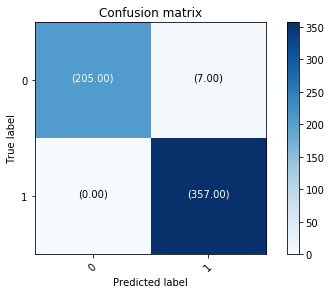

In [244]:
# Compute confusion matrix
y_pred = clf.predict(cancer.data)
cnf_matrix = confusion_matrix(cancer.target, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(cancer.target))), normalize = False,
                      title='Confusion matrix')

We can look at what are the most important features from our dataset according to the decision tree classifier

[22 27 20 23  7  3  6  2  0 13 26 21 25 12  1  5 24 10 28  4 29 16 19 17
 11  8 15  9 18 14]
Feature ranking:
1. worst perimeter (0.147311)
2. worst concave points (0.128218)
3. worst radius (0.116739)
4. worst area (0.110925)
5. mean concave points (0.110806)
6. mean area (0.053497)
7. mean concavity (0.050662)
8. mean perimeter (0.049336)
9. mean radius (0.039603)
10. area error (0.031462)
11. worst concavity (0.031017)
12. worst texture (0.016080)
13. worst compactness (0.015299)
14. perimeter error (0.012078)
15. mean texture (0.011909)
16. mean compactness (0.010874)
17. worst smoothness (0.010787)
18. radius error (0.010719)
19. worst symmetry (0.008562)
20. mean smoothness (0.004900)
21. worst fractal dimension (0.004731)
22. concavity error (0.004074)
23. fractal dimension error (0.003171)
24. concave points error (0.002979)
25. texture error (0.002723)
26. mean symmetry (0.002721)
27. compactness error (0.002301)
28. mean fractal dimension (0.002242)
29. symmetry error (0.0021

(0, 0.4522656708962193)

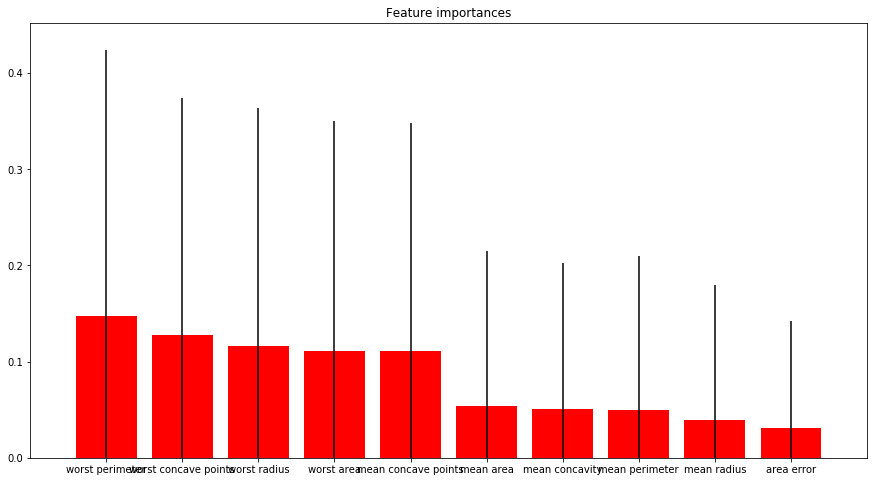

In [245]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(n_features):
    print("%d. %s (%f)" % (f + 1, cancer.feature_names[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")  # just the top 10 features
num_feat_to_plot = 10
plt.bar(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]],
       color="r", yerr=std[indices[:num_feat_to_plot]], align="center")
plt.xticks(range(num_feat_to_plot), np.array(cancer.feature_names)[indices[:num_feat_to_plot]])
plt.xlim([-1, num_feat_to_plot])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

#plt.savefig("importances.png",bbox_inches='tight')
#plt.savefig("importances.pdf",bbox_inches='tight')

Now plot the distributions of values of the top 5 features. Are there any relationships between them? You can use functions from seaborn such as distplot or jointplot to look at this.

C:\Users\hecto\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


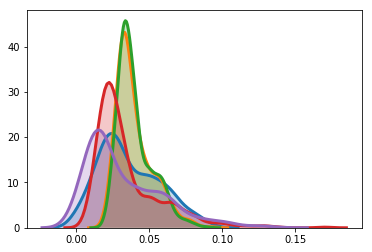

In [246]:
from sklearn import preprocessing

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'], ['target']))

subset_arr = [df['worst concave points'], df['worst perimeter'], df['worst radius'], df['worst area'], df['mean concave points']]

subset_arr_std = preprocessing.normalize(subset_arr)
for i in range(len(subset_arr)):
    sns.distplot(subset_arr_std[i], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})




# Standardisation

Did you figure out whether your data should be standardised? If so, play with different methods from the sklearn library.
You can get some ideas from here: https://scikit-learn.org/stable/modules/preprocessing.html

Make sure your data still looks OK before attempting to re-train a classifier.

In [247]:
print(cancer.data)
print ('\n Still ok')

[[1.80e+01 1.04e+01 1.23e+02 ... 2.65e-01 4.60e-01 1.19e-01]
 [2.06e+01 1.78e+01 1.33e+02 ... 1.86e-01 2.75e-01 8.90e-02]
 [1.97e+01 2.12e+01 1.30e+02 ... 2.43e-01 3.61e-01 8.76e-02]
 ...
 [1.66e+01 2.81e+01 1.08e+02 ... 1.42e-01 2.22e-01 7.82e-02]
 [2.06e+01 2.93e+01 1.40e+02 ... 2.65e-01 4.09e-01 1.24e-01]
 [7.76e+00 2.45e+01 4.79e+01 ... 0.00e+00 2.87e-01 7.04e-02]]

 Still ok


After you've standardised your data (if required), try to fit an SVM classifier again. Is the performance affected by this processing?

In [248]:


score = []
clf = svm.SVC(gamma=0.0001, C=100.)
k_fold = KFold(n_splits=10)
for train_indices, test_indices in k_fold.split(cancer.data):
    clf.fit(cancer.data[train_indices], cancer.target[train_indices])
    score.append(clf.score(cancer.data[test_indices], cancer.target[test_indices]))
print('Average accuracy without scaling (standarisation) : {} %'.format(np.mean(score)*100))

cancernorm  = preprocessing.scale(cancer.data)

for train_indices, test_indices in k_fold.split(cancer.data):
    clf.fit(cancernorm[train_indices], cancer.target[train_indices])
    score.append(clf.score(cancernorm[test_indices], cancer.target[test_indices]))
print('Average accuracy after scaling (standarisation) : {} %'.format(np.mean(score)*100))



Average accuracy without scaling (standarisation) : 94.19486215538848 %
Average accuracy after scaling (standarisation) : 95.77850877192982 %
